## BIA Bob demo
BIA Bob is a Jupyter-magic based assistant for interacting with data via code

In [1]:
from bia_bob import bob
bob.initialize('gpt-4')
bob.__version__

'0.7.0'

You can use the `%bob` single-line or the `%%bob` multi-line magic to ask for programming image analysis tasks and `bob` will do it for you.

In [3]:
%bob Load the blobs.tif image file and show it.

1. Import the imread function from the skimage.io module.
2. Use the imread function to load the 'blobs.tif' image file and store it in a variable called 'image'.
3. Import the stackview module.
4. Use the insight function from the stackview module to display the 'image' variable.

Here is the finalized code:



StackViewNDArray([[ 40,  32,  24, ..., 216, 200, 200],
                  [ 56,  40,  24, ..., 232, 216, 216],
                  [ 64,  48,  24, ..., 240, 232, 232],
                  ...,
                  [ 72,  80,  80, ...,  48,  48,  48],
                  [ 80,  80,  80, ...,  48,  48,  48],
                  [ 96,  88,  80, ...,  48,  48,  48]], dtype=uint8)
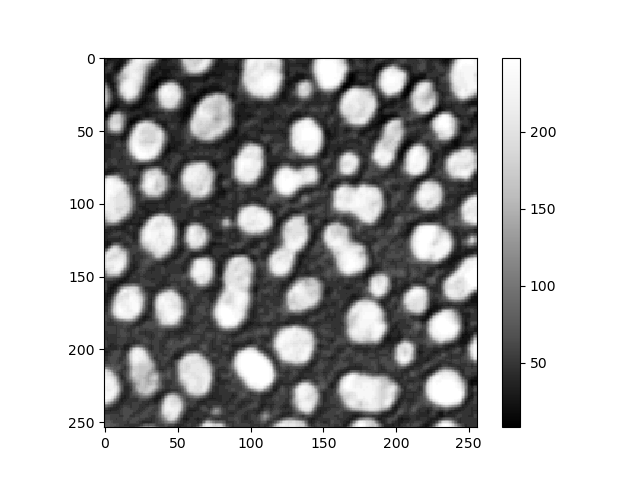
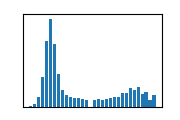

In [4]:
from skimage.io import imread
import stackview

image = imread('blobs.tif')
stackview.insight(image)

In [6]:
%%bob
Load the blobs.tif grayscale image from disc.
Segment the nuclei-like objects in it using 
Otsu's method and connected component labeling.
Measure area of the segmented labels.
Print the area on top of the labels.

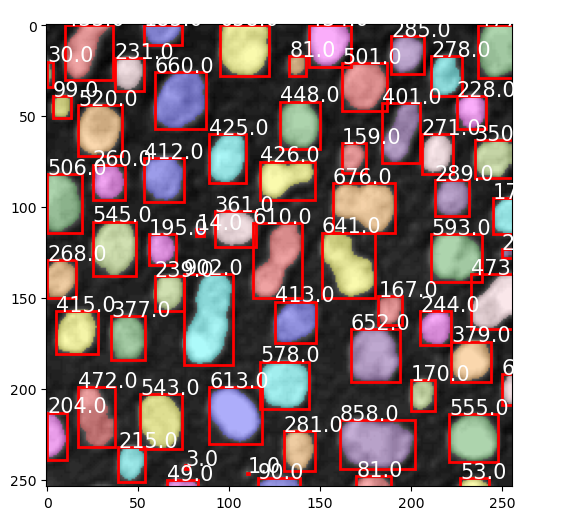

In [7]:
# necessary imports
from skimage.io import imread
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops
from skimage.color import label2rgb
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# load the image
image = imread('blobs.tif')

# segment the image using Otsu's method
thresh = threshold_otsu(image)
binary = image > thresh

# labeling connected components in the binary image
labels = label(binary)

# individual properties for each region (label)
props = regionprops(labels)

# create a RGB image to overlay labels on
image_label_overlay = label2rgb(labels, image=image)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for prop in props:
    minr, minc, maxr, maxc = prop.bbox
    area = prop.area
    # create a rectangle patch
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)
    # print area on the image
    plt.text(minc, minr, str(area), color='white', size=15)

plt.show()

In [9]:
%%bob
Take the segmented label image and expand the labels by 4 pixels. Show the resulting label image alone.

StackViewNDArray([[0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
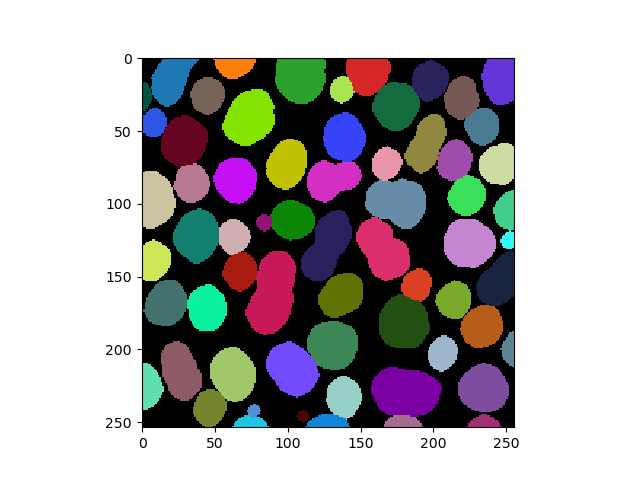

In [10]:
from skimage.segmentation import expand_labels
import stackview

# expanding labels
expanded_labels = expand_labels(labels, distance=4)

# showing the expanded labels
stackview.insight(expanded_labels)